In [1]:
from msml.experiments.ablation.ablation import *
%load_ext autoreload
%autoreload 2

In [2]:
val_dfs, cfgs = wandb_import('SSL_VAL_4.0', val_only=False)
len(val_dfs)

100%|██████████| 49/49 [19:46<00:00, 24.22s/it]


34

In [20]:
cfgs[:20]['lr'].nunique(), cfgs[:20]['batch_size'].nunique()

(6, 3)

In [25]:
cfgs[:20]['lr'].value_counts(), cfgs[:20]['batch_size'].nunique()

(0.00030    5
 0.00010    3
 0.00005    3
 0.00020    3
 0.00040    3
 0.00100    3
 Name: lr, dtype: int64,
 3)

In [40]:
lr_bs_dfs = cfgs[:20].drop_duplicates(subset=['run_name']).copy()
m = '[Linear probing] CosineSimilarity'
lr_bs_dfs[m] = [df[m].max() for i, df in enumerate(val_dfs) if i in lr_bs_dfs.index]
lr_bs_dfs

,lr,args,seed,test,model,d_peak,scnorm,d_model,dformat,dropout,...,max_batch_var_features,entropy_label_smoothing,graphormer_parametrized,ssl_probing_dataset_pth,random_fine_tuning_split,num_val_batches,num_val_samples,num_train_batches,num_train_samples,[Linear probing] CosineSimilarity
0,0.00030,"Namespace(run_name='9rlP6D0mWO_0.0003_128', pr...",3407,False,DreaMS,44,False,1024,<msml.utils.dformats.DataFormatA object at 0x2...,0.1,...,None,0,False,/scratch/project/open-26-5/msml/msml/data/MIST...,False,NaN,NaN,NaN,NaN,0.468311
1,0.00010,"Namespace(run_name='eNGoJAHD9O_0.0001_128', pr...",3407,False,DreaMS,44,False,1024,<msml.utils.dformats.DataFormatA object at 0x2...,0.1,...,None,0,False,/scratch/project/open-26-5/msml/msml/data/MIST...,False,NaN,NaN,NaN,NaN,0.572262
2,0.00005,"Namespace(run_name='uDYosG3BSv_5e-05_128', pro...",3407,False,DreaMS,44,False,1024,<msml.utils.dformats.DataFormatA object at 0x2...,0.1,...,None,0,False,/scratch/project/open-26-5/msml/msml/data/MIST...,False,NaN,NaN,NaN,NaN,0.573509
3,0.00005,"Namespace(run_name='LbqjvPUnGx_5e-05_256', pro...",3407,False,DreaMS,44,False,1024,<msml.utils.dformats.DataFormatA object at 0x2...,0.1,...,None,0,False,/scratch/project/open-26-5/msml/msml/data/MIST...,False,NaN,NaN,NaN,NaN,0.574586
4,0.00005,"Namespace(run_name='IdzFLMeyWq_5e-05_512', pro...",3407,False,DreaMS,44,False,1024,<msml.utils.dformats.DataFormatA object at 0x2...,0.1,...,None,0,False,/scratch/project/open-26-5/msml/msml/data/MIST...,False,NaN,NaN,NaN,NaN,0.576260
5,0.00030,"Namespace(run_name='KTVUcbBpbI_0.0003_512', pr...",3407,False,DreaMS,44,False,1024,<msml.utils.dformats.DataFormatA object at 0x2...,0.1,...,None,0,False,/scratch/project/open-26-5/msml/msml/data/MIST...,False,NaN,NaN,NaN,NaN,0.479658
6,0.00020,"Namespace(run_name='j2d2cXFi9F_0.0002_128', pr...",3407,False,DreaMS,44,False,1024,<msml.utils.dformats.DataFormatA object at 0x2...,0.1,...,None,0,False,/scratch/project/open-26-5/msml/msml/data/MIST...,False,NaN,NaN,NaN,NaN,0.482602
7,0.00010,"Namespace(run_name='771dJv5GN8_0.0001_256', pr...",3407,False,DreaMS,44,False,1024,<msml.utils.dformats.DataFormatA object at 0x2...,0.1,...,None,0,False,/scratch/project/open-26-5/msml/msml/data/MIST...,False,NaN,NaN,NaN,NaN,0.575159
8,0.00010,"Namespace(run_name='dfcWIZPiE7_0.0001_512', pr...",3407,False,DreaMS,44,False,1024,<msml.utils.dformats.DataFormatA object at 0x2...,0.1,...,None,0,False,/scratch/project/open-26-5/msml/msml/data/MIST...,False,NaN,NaN,NaN,NaN,0.577819
9,0.00020,"Namespace(run_name='JA3DsWwYI4_0.0002_512', pr...",3407,False,DreaMS,44,False,1024,<msml.utils.dformats.DataFormatA object at 0x2...,0.1,...,None,0,False,/scratch/project/open-26-5/msml/msml/data/MIST...,False,NaN,NaN,NaN,NaN,0.568380


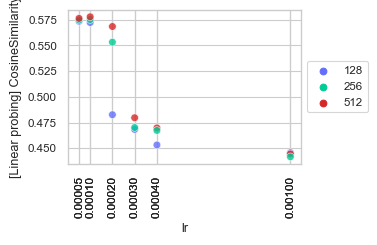

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from msml.utils.plots import init_plotting
init_plotting(figsize=(3, 2))
sns.scatterplot(x=lr_bs_dfs['lr'], y=lr_bs_dfs[m], hue=lr_bs_dfs['batch_size'].astype(str), s=30, alpha=0.8)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(lr_bs_dfs['lr'], rotation='vertical')
plt.show()